# Carga de datos

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [9]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


# Desarrollo

In [10]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [11]:
train[['GrLivArea', 'SalePrice']].head()

,GrLivArea,SalePrice
0,1710,208500
1,1262,181500
2,1786,223500
3,1717,140000
4,2198,250000


<Axes: xlabel='GrLivArea', ylabel='SalePrice'>

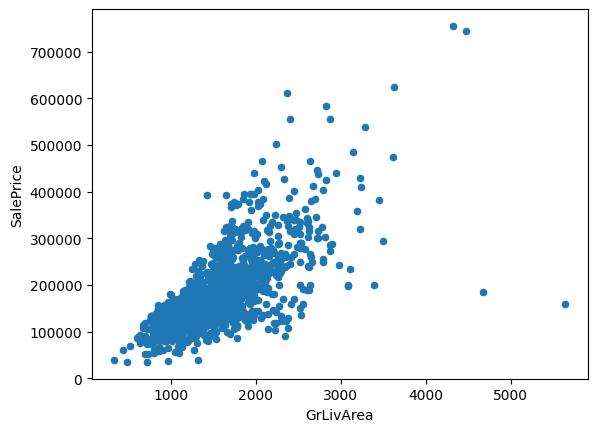

In [12]:
train.plot.scatter(x='GrLivArea', y='SalePrice')

In [13]:
train['GrLivArea'].min()

334

In [14]:
w = 125
b = 0

Fórmula de la recta:

\begin{equation}

f(x)=w \cdot x + b 

\end{equation}
donde $b$ es el intercepto y $ w $ es la pendiente.

Entoces...

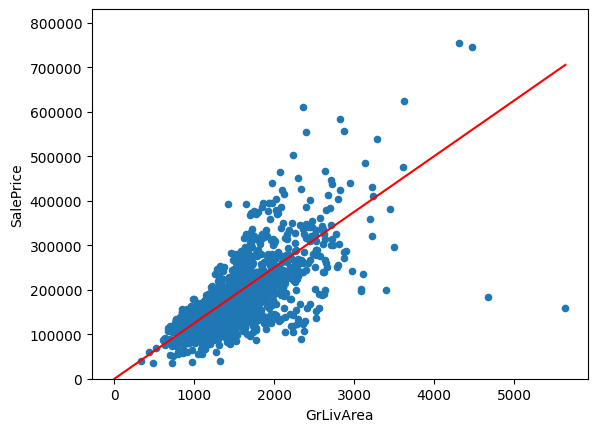

In [17]:
# Puntos de la recta
x =  np.linspace(0,train['GrLivArea'].max(), 100 )
y = w*x + b

# graficación
train.plot.scatter(x = 'GrLivArea', y = 'SalePrice')
plt.plot(x, y, '-r')
plt.ylim(0, train['SalePrice'].max()* 1.1)

plt.show()

Se puede jugar n veces con los valores de $ w, b $ hasta tener la recta que se vea que está más cerca.

Existe una fórmula que nos permite encontrar una recta más eficiente la cual es:
$$
\frac{1}{n} \cdot \sum_{i=1}^{n}(\hat{y_i} - y_i)^2
$$
Donde ${n}$ es la cantidad de datos, ${y_i}$ es el valor de los datos y ${\hat{y_i}}$ es la predicción

In [18]:
# predicciones
train['pred'] = train['GrLivArea']*w+b

In [20]:
# Cálculo de la función de error
train['diff'] = train['pred'] - train['SalePrice']
train['cuad'] = train['diff'] ** 2
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,pred,diff,cuad
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,2,2008,WD,Normal,208500,213750,5250,27562500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,NaN,0,5,2007,WD,Normal,181500,157750,-23750,564062500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,NaN,0,9,2008,WD,Normal,223500,223250,-250,62500


In [21]:
train['cuad'].mean()

3300407822.406164

In [25]:
from sklearn.linear_model import LinearRegression

x_train = np.array(train['GrLivArea']).reshape((-1, 1))
y_train = np.array(train['SalePrice'])

model = LinearRegression(fit_intercept = False)
model.fit(x_train, y_train)

#Se imprimen los parametros de w y b
print(f"Intercepto (b):  {model.intercept_} ")
print(f"Pendiente (w):  {model.coef_} ")

Intercepto (b):  0.0 
Pendiente (w):  [118.06909986] 


(0.0, 830500.0000000001)

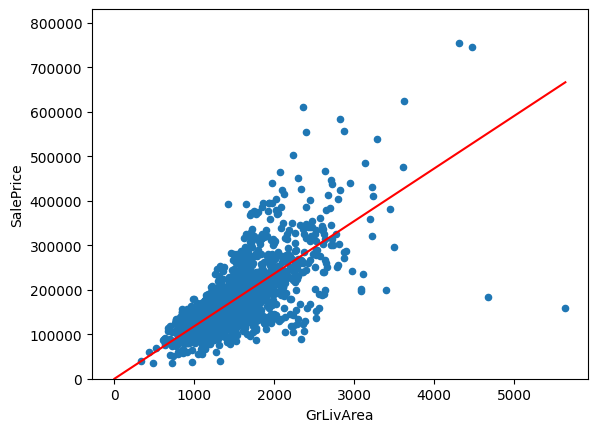

In [38]:
# Puntos de la recta
X =  np.linspace(0,train['GrLivArea'].max(), 100 )
Y = model.coef_ * x + model.intercept_

# graficación
train.plot.scatter(x = 'GrLivArea', y = 'SalePrice')
plt.plot(X,Y , '-r')
plt.ylim(0, train['SalePrice'].max()* 1.1)
